# Forest Fires in Brazil

In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [112]:
data=pd.read_csv('amazon.csv',encoding='iso-8859-1')


In [113]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [55]:
#1. Display Top 5 Rows of The Dataset
data.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [56]:
#2. Check Last 5 Rows
data.tail(5)

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [11]:
#3. Find Shape of Our Dataset (Number of Rows And Number of Columns)
data.shape

(6454, 5)

In [57]:
#4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [58]:
#5. Check For Duplicate Data and Drop Them
data.duplicated().any()

True

In [65]:
data=data.drop_duplicates()

In [67]:
data.shape

(6422, 5)

In [42]:
#Check Null Values In The Dataset
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [44]:
#7. Get Overall Statistics About The Dataframe
data.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [125]:
#8. Rename Month Names To English
data['English_Month']=data['month'].map({'Janeiro':'January',
                                         'Marco':'March',
                                         'Abril':'April'})

In [126]:
data.head(10)

,year,state,month,number,date,English_Month
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January
5,2003,Acre,Janeiro,10.0,2003-01-01,January
6,2004,Acre,Janeiro,0.0,2004-01-01,January
7,2005,Acre,Janeiro,12.0,2005-01-01,January
8,2006,Acre,Janeiro,4.0,2006-01-01,January
9,2007,Acre,Janeiro,0.0,2007-01-01,January


In [68]:
#Total Number of Fires Registered
data.shape

(6422, 5)

In [127]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'English_Month'], dtype='object')

In [147]:
#10. In Which Month Maximum Number of Forest Fires Were Reported?
max_month=data.groupby('month')['number'].sum().reset_index()

In [148]:
max_month

,month,number
0,Abril,28188.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30848.050
4,Janeiro,47747.844
5,Julho,92326.113
6,Junho,56010.675
7,Maio,34731.363
8,Março,30717.405
9,Novembro,85508.054


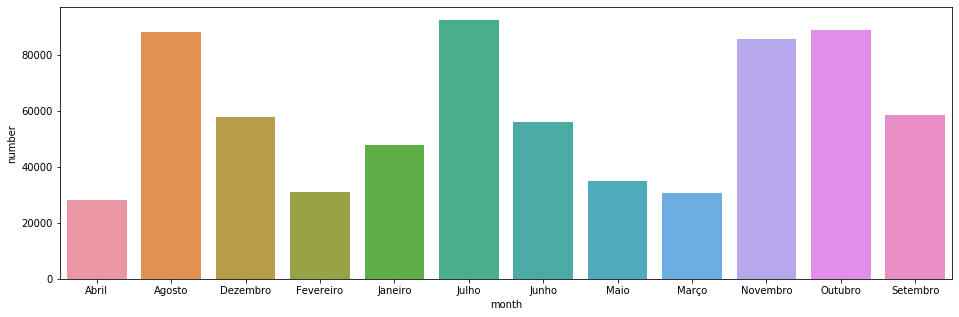

In [152]:
plt.figure(figsize=(16,5))
sns.barplot(x="month",y="number",data=max_month)

In [159]:
#11. In Which Year Maximum Number of Forest Fires Was Reported?
max_year=data.groupby('year')['number'].sum().reset_index()

In [160]:
max_year

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600
5,2003,42760.674
6,2004,38453.163
7,2005,35004.965
8,2006,33832.161
9,2007,33037.413


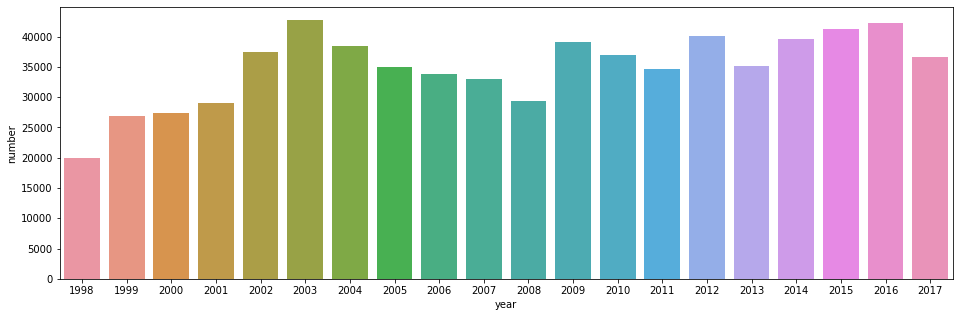

In [167]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=max_year)

In [168]:
#12. In Which State Maximum Number of Forest Fires Was Reported?
max_state=data.groupby('state')['number'].sum().reset_index()

In [169]:
max_state

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


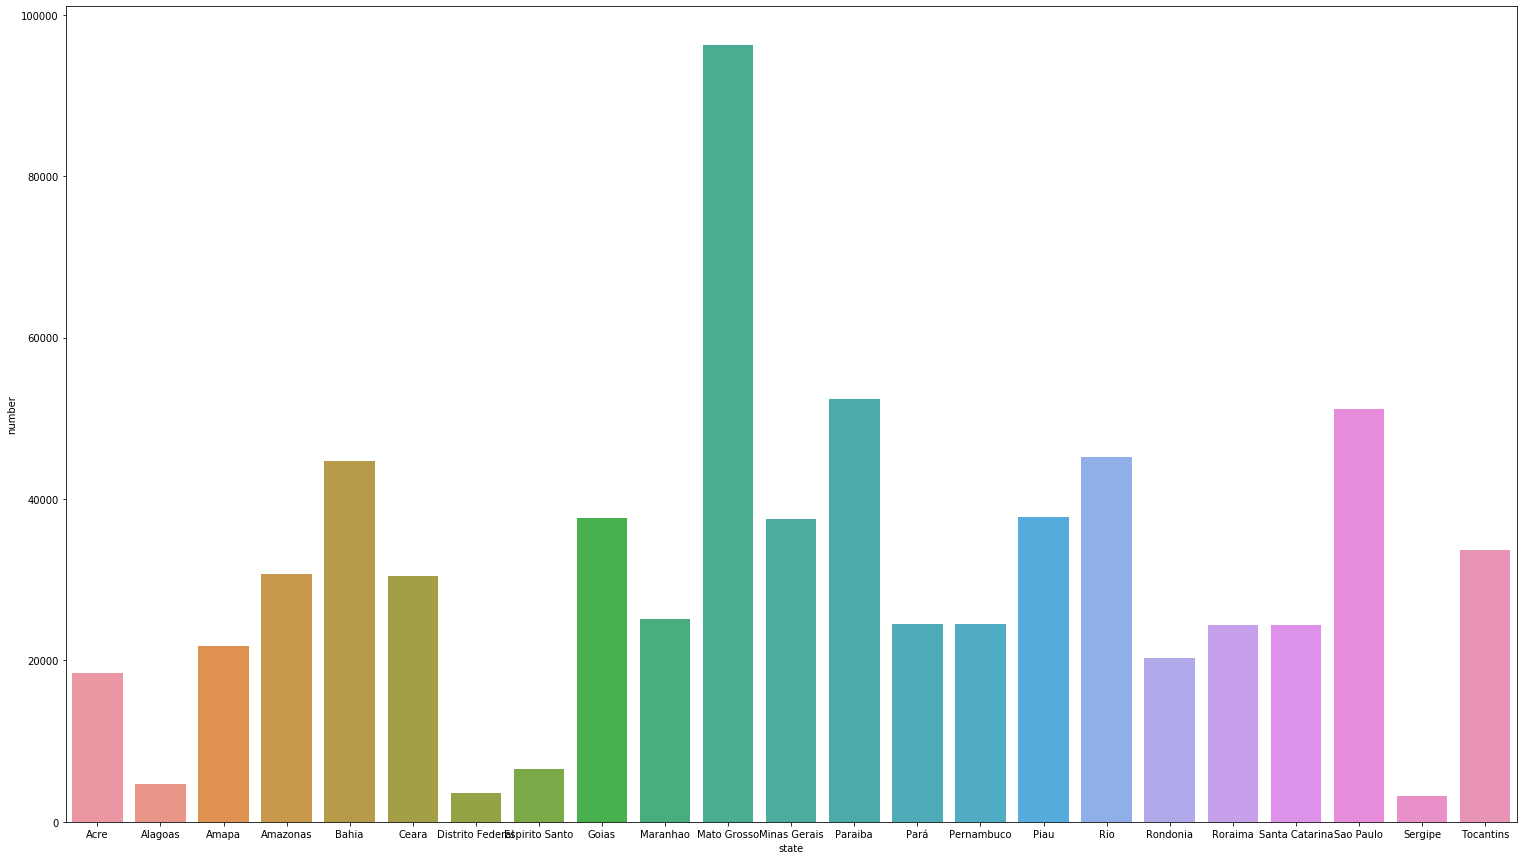

In [174]:
plt.figure(figsize=(26,15))
sns.barplot(x="state",y="number",data=max_state)

In [179]:
# Find Total Number of Fires Were Reported In Amazonas
data[data['state']=="Amazonas"]['number'].sum()

30650.129

In [190]:
#14. Display Number of Fires Were Reported In Amazonas (Year-Wise)
data1=data[data['state']=='Amazonas']
data2=data1.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


In [192]:
#15. Display Number of Fires Were Reported In Amazonas (Day-Wise)
data3=data[data['state']=='Amazonas']
data4=data1.groupby('date')['number'].sum().reset_index()
data4

,date,number
0,1998-01-01,946.000
1,1999-01-01,1061.000
2,2000-01-01,853.000
3,2001-01-01,1297.000
4,2002-01-01,2852.000
5,2003-01-01,1524.268
6,2004-01-01,2298.207
7,2005-01-01,1657.128
8,2006-01-01,997.640
9,2007-01-01,589.601


In [196]:
# Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’
#2nd method from above
fire=data[data['year']==2015].groupby('month')['number'].sum().reset_index()

In [197]:
fire

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


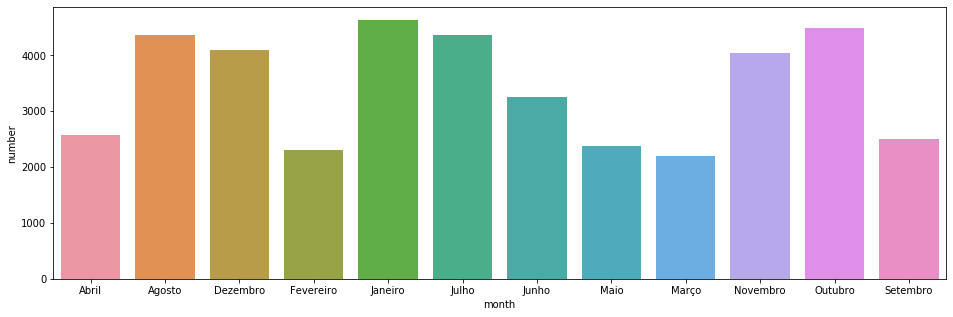

In [198]:
plt.figure(figsize=(16,5))
sns.barplot(x="month",y="number",data=fire)

In [202]:
#Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)
data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


In [206]:
#To Find The State Names Where Fires Were Reported In 'dec' Month
fire_report=data[data['month']=='Dezembro']['state'].unique()

In [207]:
fire_report

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)